In [0]:
import numpy as np
import matplotlib.pyplot as plt


# Basic NumPy Arrays(어레이)

금융 데이터 분석에서 numpy를 활용한 가장 단순한 예제는 다음과 같이 몇몇 주식들의 기간 수익률이 주어졌을 때 평균을 구하는것 입니다.

In [0]:
stock_list = [3.5, 5, 2, 8, 4.2]
returns = np.array(stock_list)
print(returns, type(returns))

[3.5 5.  2.  8.  4.2] <class 'numpy.ndarray'>


타입명을 보시면 그냥 array가 아닌 ndarray 라고 되어있습니다. 이는 NumPy 어레이가 차원(multiple dimensions)을 가질수 있기 때문입니다. np.array() 함수에 리스트 안에 리스트를 넣으면 2차원 어레이가 만들어집니다. 만약 리스트 안에 리스트 안에 리스트를 넣으면 3차원 어레이가 만들어집니다. 이와 같이 차원을 확장시켜 n차원 어레이를 만들 수 있습니다.

In [0]:
A = np.array([[1, 2], [3, 4]])
print(A, type(A))

[[1 2]
 [3 4]] <class 'numpy.ndarray'>


In [0]:
print(A.shape)

(2, 2)


In [0]:
print(np.log(A))

[[0.         0.69314718]
 [1.09861229 1.38629436]]


In [0]:
# 입력받은 어레이의 평균을 계산합니다.
print(np.mean(A))
# 입력받은 어레이에서 가장 큰 값을 계산합니다.
print(np.max(A))

2.5
4


In [0]:
returns = np.array([3.5, 5, 2, 8, 4.2])
print(returns + 100)
print(returns * 10)
print(returns * 2 + 5)
# 평균과 표준편차
print("Mean: ", np.mean(returns), "Std Dev: ", np.std(returns))

[103.5 105.  102.  108.  104.2]
[35. 50. 20. 80. 42.]
[12.  15.   9.  21.  13.4]
Mean:  4.54 Std Dev:  1.9915822855207364


이제 NumPy 함수들을 사용하여 가상의 자산 포트폴리오를 만들어 보도록 하겠습니다. returns 라는 어레이를 만들어 종목 마다 월별 가격 변동률을 저장합니다. 이 때 월별 가격 변동은 평균이 1.01이고 표준편차가 0.03인 정규분포를 따른다고 가정하도록 합니다. 다음과 같이 코드를 작성하여 100개월 간의 가격변동을 나타낼 수 있습니다.

In [0]:
R_base = np.random.normal(1.01, 0.03, 100)
returns = R_base
returns

array([1.05232827, 0.96378513, 1.01949252, 1.00614092, 1.01061266,
       1.01789338, 0.97528707, 1.012396  , 1.04813051, 1.00226881,
       0.99450029, 1.01639029, 1.03061156, 1.02167805, 1.02553227,
       0.96609967, 0.98614016, 1.02757478, 0.9810574 , 0.99074428,
       0.9981475 , 0.9651329 , 1.07708266, 1.02171527, 1.00232643,
       0.99960718, 0.95841828, 1.03532294, 1.06711806, 1.02852999,
       1.05472233, 0.96929029, 1.04904528, 0.98269213, 1.00505586,
       0.9979275 , 0.9904689 , 0.98224094, 1.01881275, 1.02535813,
       0.96724723, 1.01455819, 1.02698253, 1.00128166, 0.99918254,
       1.00189214, 1.02657844, 1.02621361, 0.97763208, 1.05980386,
       1.05229481, 1.02544764, 0.98243413, 1.05200312, 1.01030768,
       1.04097826, 1.01449782, 0.99883511, 1.02293346, 0.96067843,
       1.01424733, 0.97609702, 1.02288391, 0.98464183, 0.98946239,
       1.00485983, 1.02938579, 1.04623965, 1.00239479, 0.93058244,
       1.00927617, 1.01337448, 1.0138405 , 0.9660946 , 1.02222

NumPy의 random(랜덤)모듈은 이런 난수 값을 발생시킬때 유용합니다. 랜덤 모듈에는 다양한 샘플링을 위한 확률 분포(Probability Distribution)가 내장되어있습니다. 자세한 내용은 확률 변수(Random Variables)를 다루는 강의에서 설명하도록 하겠습니다. 여기에서  𝑅𝑏𝑎𝑠𝑒 는 평균이  1.01 이고 표준편차가  0.03 인 정규분포에서 100개의 샘플을 저장한 어레이(벡터)라고 이해하시면 됩니다.

위 출력 결과를 해석 하면 다음과 같습니다. 첫째달은 전월대비 가격이 0.43993% 상승하였고 둘째달은 전월대비 2.186788% 상승 ... 마지막인 100개월 이후에는 전월 대비 가격이 1.04309% 상승한 것 입니다.  (랜덤값으로 실행 마다 결과값은 다름))

누적 가격 변동은 월별 가격 변동을 누적하여 곱해주면 됩니다. np.cumprod()함수를 사용하여 이런 누적 곱셈에 대한 계산이 손쉽게 가능합니다.

In [0]:
np.cumprod([1,2,3,4,5])
assets = np.cumprod(R_base)
assets

array([1.05232827, 1.01421833, 1.033988  , 1.04033764, 1.05137839,
       1.0701911 , 1.04374355, 1.0566818 , 1.10754042, 1.11005323,
       1.10394826, 1.12204229, 1.15638975, 1.18145802, 1.21162332,
       1.17054889, 1.15432528, 1.18615554, 1.16368667, 1.15291591,
       1.15078013, 1.11065576, 1.19626807, 1.22224535, 1.22508882,
       1.22460759, 1.17368629, 1.21514434, 1.29670247, 1.33369737,
       1.40668039, 1.36348165, 1.43035398, 1.4055976 , 1.4127041 ,
       1.40977627, 1.39633955, 1.37154186, 1.39734434, 1.43277838,
       1.38585092, 1.40602639, 1.44396454, 1.44581521, 1.44463331,
       1.44736676, 1.48583551, 1.52478462, 1.49067836, 1.57982669,
       1.66244342, 1.70474868, 1.67480329, 1.76189829, 1.78005938,
       1.85300312, 1.87986762, 1.87767777, 1.92073942, 1.84521292,
       1.87150227, 1.82676779, 1.86857138, 1.83987355, 1.82048569,
       1.82933295, 1.88308934, 1.97016274, 1.97488086, 1.83778945,
       1.85483709, 1.87964458, 1.9056598 , 1.84104765, 1.88197

이 아이디어를 확장하여 주식  10 종목과  100 개월 동안의 기간에 해당하는 데이터를 가상으로 만들어 보도록 하겠습니다. 다음과 같이 종목 수 인  𝑁  값에 10을 지정하고 100개월간 데이터를 저장하기 위해 2차원 어레이를 생성합니다. 다음과 같이 np.zeros(shape)를 사용하여 모든 값이 0인 어레이를 원하는 shape에 맞게 만들 수 있습니다. 여기서  𝑁  값이 10이기 때문에 모든 값이 0으로 초기화 된 10행 100열 짜리 2차원 어레이( 𝑁×100 )가 생성됩니다.

In [0]:
N = 10
returns = np.zeros((N,100))
assets = np.zeros((N,100))

In [0]:
#  첫 행의 데이터(첫번째 종목)를 위에서 계산하였던 값으로 채워줍니다.
returns[0] = R_base
assets[0] = np.cumprod(R_base)

In [0]:
#  나머지 9종목 각각에 대한 100개월치 데이터를 채우기 위해 for 루프를 사용하여 값을 채워줍니다. 
#  이 때 나머지 9개의 자산이 첫 번째 자산과 가격움직임이 유사하도록(correlated) 설정하기 위해 
#  다음과 같이 처음에 만든  𝑅𝑏𝑎𝑠𝑒  벡터에 노이즈 움직임을 나타내는  𝑅𝑖 (Random Noise) 벡터를 더해 다음과 같이 값을 채워줍니다.

# 처음 자산에 대한 데이터는 R_base를 활용하여 채웠기 때문에
# 1부터 시작합니다.
for i in range(1, N):
    
    # 자산가격 움직임이 유사하도록 만들기 위해 다음과 같이 R_i 벡터를 설정합니다.
    R_i = R_base + np.random.normal(0.001, 0.02, 100)
    # i번째 행(i번째 자산)을 채워줍니다.   
    returns[i] = R_i
    assets[i] = np.cumprod(R_i)

# 각 자산별 평균 수익률과 표준편차를 계산합니다.
mean_returns = [(np.mean(R) - 1)*100 for R in returns]
return_volatilities = [np.std(R) for R in returns]

Text(0.5, 1.0, 'Returns for 10 Random Assets')

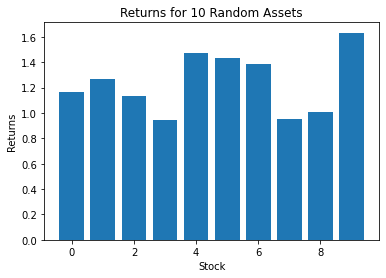

In [0]:
plt.bar(np.arange(len(mean_returns)), mean_returns)
plt.xlabel('Stock')
plt.ylabel('Returns')
plt.title('Returns for {0} Random Assets'.format(N))

# 기대 수익률 계산하기

지금 까지 여러 자산의 가격 변동 및 수익률에 대한 데이터를 생성해 보았습니다. 이제 이 자산들을 포트폴리오에 담아 기대 수익률을 계산해 보도록 하겠습니다. 먼저  𝑁 개의 자산들 각각의 가중치(weight)를 생성하여 봅시다.

In [0]:
weights = np.random.uniform(0,1,N)
weights = weights/np.sum(weights)

위의 weights 벡터는 각 자산별 보유 비중을 의미합니다. 0과 1사이 에서 난수를 N개 발생 시켜 벡터를 만든 뒤, 총합이 1이 되도록 만들어 주기 위해 np.sum(weights)값으로 각 원소들을 나누어 줍니다.

In [0]:
weights

array([0.20098184, 0.07430696, 0.09698758, 0.08683001, 0.01297353,
       0.18419671, 0.00650885, 0.20206944, 0.10562961, 0.02951547])

In [0]:
weights.sum()

0.9999999999999999

위와 같이 10개의 자산에 대한 보유 비중이 랜덤으로 설정되었으며 총합이 1로 맞추어 졌습니다.

포트폴리오의 기대 수익률을 계산하려면 위에서 만든 수익률 데이터에 가중치 값을 곱하여 더해 주어야 합니다. 이 계산을 하기위해 반복문인 for문을 사용할 수도 있지만 numpy의 dot()함수를 사용하여 손쉽게 계산이 가능합니다. dot()함수는 같은 크기를 같는 두 벡터의 스칼라 곱(dot product)를 반환 합니다.

만약  𝑣=[1,2,3]  이고  𝑤=[4,5,6]  으로 주어져 있다면

𝑣⋅𝑤=1×4+2×5+3×6
 
와 같이 계산되어 집니다.

일차원 벡터의 경우, 스칼라 곱은 각각의 원소들을 끼리끼리 곱하여 더한 값을 갖게 됩니다. 위에서 만든 가중치 벡터  𝜔=[𝜔1,𝜔2,…𝜔𝑁]  와 자산별 평균 수익률 벡터  𝜇=[𝜇1,𝜇2,…,𝜇𝑁] 를 dot()함수를 통해 계산하면 다음과 같이 포트폴리오 전체의 평균 수익률을 얻을 수 있습니다.

𝜔⋅𝜇=𝜔1𝜇1+𝜔2𝜇2+⋯+𝜔𝑁𝜇𝑁=𝜇𝑃

In [0]:
p_returns = np.dot(weights, mean_returns)
print("Expected return of the portfolio: ", p_returns)

Expected return of the portfolio:  1.160460380972902


# NaN 값들 다루기
NumPy를 활용하여 실수(Real Number) 값들을 다루다 보면 종종 어레이 상의 nan(Not a Number)값들을 마주치게 됩니다. 이런 nan값들은 데이터가 비어있거나 존재하지 않는 경우를 나타냅니다. 이런 nan값들을 그대로 두고 함수 계산을 적용했다가는 에러가 발생하거나 nan값이 그대로 출력될 가능성이 높습니다. 따라서 에러를 발생시키지 않기 위해 nan값들을 처리하는 방법들을 알아보도록 하겠습니다.

In [0]:
v = np.array([1, 2, np.nan, 4, 5])
print(v)

[ 1.  2. nan  4.  5.]


In [0]:
print(np.mean(v))

nan


In [0]:
np.isnan(v)

array([False, False,  True, False, False])

In [0]:
ix = ~np.isnan(v) # ix에 nan값이 없는 곳에 True 값들을 지정합니다.
print(v[ix]) # 인덱스 어레이가 True 인곳만 선택이 됩니다.

[1. 2. 4. 5.]


In [0]:
np.mean(v[ix])

3.0

# 선형대수(Linear Algebra)에 대한 간단한 소개
선형대수는 금융 분야뿐만 아니라 다른 분야에서 널리 사용되고 있습니다. 포트폴리오 이론(Mordern Portfolio Theory)에서 최적의 가중치(Optimal Weight)를 계산할 때 선형대수의 기법이 사용됩니다. NumPy는 이런 선형대수 계산에 필요한 많은 기능들을 제공합니다. 선형대수에 대한 간단한 소개와 NumPy로 어떻게 선형대수 관련 연산이 가능한지 알아보도록 하겠습니다.

먼저 스칼라(Scalar)와 행렬의 곱셈, 합성에 대해 알아보겠습니다. 스칼라는 수학적으로 엄밀히 정의하면 벡터공간(Vector Space)을 이루는 체(Field)의 원소를 의미합니다. 여기서는 단순하게 행렬에 곱해지는 실수(Real Number)라고 생각하시면 됩니다. 스칼라 값을 행렬에 곱함으로써 행렬을 스케일링(scaling)을 할 수 있습니다. 스칼라를 행렬에 곱한다는 것은 행렬 각각의 원소에 스칼라 값을 곱해주는 것 입니다.

행렬은 값들을 모아놓은 형태를 가집니다.  𝑚×𝑛  행렬은  𝑚 행  𝑛 열로 구성되어있음을 의미합니다. 어떤  𝑚×𝑛  행렬에서  𝑚=𝑛 이라면 정사각 행렬(square matrix)이라 부릅니다. 또  𝑚=1 이거나  𝑛=1 인 특수한 경우 해당 행렬을 벡터라고 부릅니다. numpy에는 행렬을 따로 표현하는 matrix객체가 존재하지만 array를 통해서도 행렬의 모든것이 표현 가능하기 때문에 여기서는 array만 사용하기로 합니다. 따라서 이 장에서는 행렬과 어레이를 같은것으로 생각하셔도 됩니다.

일반적으로 행렬이 들어간 방정식을 다음과 같이 표현 가능합니다.

𝑦=𝐴⋅𝑥
 
𝐴 는  𝑚×𝑛  행렬,  𝑦 는  𝑚×1  벡터, 그리고  𝑥 는  𝑛×1  벡터를 나타냅니다. 위 식의 우측에서 행렬에 벡터를 곱하는 연산을 사용하였습니다. 어떤 연산을 사용하려면 먼저 그 연산을 정의해야 합니다. 스칼라와 행렬을 곱하는 연산은 위에서 각 원소마다 스칼라를 곱하는 방식으로 정의하였습니다. 그렇다면 행렬과 행렬(또는 벡터)의 곱은 어떻게 정의되는것 일까요?

# 행렬 곱셈
실수 끼리의 곱셈에서는  2×3=3×2=6  과 같이 곱셈의 순서를 거꾸로 해도 같은 값이 계산됩니다. 이를 "교환법칙이 성립한다(commutative)"고 합니다. 하지만 행렬의 곱셈에서는 교환법칙이 성립하지 않습니다. 즉 곱해지는 순서에 따라 곱셈 결과가 달라지거나 심지어 정의가 되지 않기도 합니다.

In [0]:
A = np.array([
          [1, 2, 3, 12, 6],
        [4, 5, 6, 15, 20],
        [7, 8, 9, 10, 10]        
    ])
B = np.array([
        [4, 4, 2],
        [2, 3, 1],
        [6, 5, 8],
        [9, 9, 9]
    ])

위에서 생성된 행렬 A는  3×5 , B는  4×3 의 shape를 가지게 됩니다. 즉 서로 다른 shape를 가지게 되는것입니다. 행렬의 곱셈이 정의되기 위해서는 이 shape가 매우 중요합니다. 곱하기 연산자( ⋅ ) 왼쪽 행렬의 열(column)수가 오른쪽 행렬의 행(row)수와 일치해야지만 곱셈이 정의 됩니다. 만약  𝑚×𝑛 행렬에  𝑝×𝑞 행렬을 우측에 곱한다면  𝑛=𝑝 인 경우에만 곱셈이 정의 되며 결과로 계산되는 행렬의 사이즈는 다음과 같이 계산되어 집니다.

# (𝑚×𝑛)⋅(𝑝×𝑞)=(𝑚×𝑞)

In [0]:
np.dot(A,B)

ValueError: ignored

위에서 살펴보았듯 A는  3×5 , B는  4×3 의 shape를 가집니다. 5와 4가 일치하지 않기 때문에 이 곱셈은 정의되지 않습니다. 하지만 A와 B의 순서를 바꾸게 되면  (4×3)⋅(3×5)=(4×5)  이기 때문에 곱셈이 정의되며 다음과 같이 4행 5열의 행렬이 계산됩니다.

In [0]:
np.dot(B,A)

array([[ 34,  44,  54, 128, 124],
       [ 21,  27,  33,  79,  82],
       [ 82, 101, 120, 227, 216],
       [108, 135, 162, 333, 324]])

# 포트폴리오의 분산(Portfolio Variance)
다시 포트폴리오의 예제로 돌아와 봅시다. NumPy의 난수 생성 기능을 통해 랜덤으로 가중치를 두어 기대 수익률을 계산했습니다. 그렇다면 포트폴리오의 분산은 어떻게 계산할까요? 포트폴리오가 각 종목과 해당되는 가중치만큼 자산이 배분되어 구성되었기에 다음과 같이 식을 쓸 수 있습니다.

𝑉𝐴𝑅[𝑃]=𝑉𝐴𝑅[𝜔1𝑆1+𝜔2𝑆2+⋯+𝜔𝑁𝑆𝑁]
 
𝑆0,⋯,𝑆𝑁 는 포트폴리오에 들어있는 자산들을 의미합니다. 만약 모든 자산들이 독립(independent)이라면 자산들 끼리의 공분산(covariance)이 0이 되기 때문에 위 값은 단순하게 다음 식으로 계산이 가능합니다.

𝑉𝐴𝑅[𝑃]=𝑉𝐴𝑅[𝜔1𝑆1]+𝑉𝐴𝑅[𝜔2𝑆2]+⋯+𝑉𝐴𝑅[𝜔𝑁𝑆𝑁]=𝜔21𝜎21+𝜔22𝜎22+⋯+𝜔2𝑁𝜎2𝑁
 
하지만 자산들의 데이터를 생성할 때 나머지 9개의 자산이 첫 번째 자산과 가격움직임이 유사하도록(correlated) 설정되었기 때문에 각 자산들은 서로 독립적이지 않습니다. 그렇기 때문에 포트폴리오의 분산을 계산할 때 각 자산들 끼리의 공분산들을 더해주어야 합니다. 포트폴리오 분산에 대한 계산식에 다음과 같이 공분산들의 값들이 추가됩니다.

𝑉𝐴𝑅[𝑃]=𝜎2𝑃=∑𝑖𝜔2𝑖𝜎2𝑖+∑𝑖∑𝑖≠𝑗𝜔𝑖𝜔𝑗𝜎𝑖𝜎𝑗𝜌𝑖,𝑗, 𝑖,𝑗∈{1,2,⋯,𝑁}
 
𝜌𝑖,𝑗 는  𝑆𝑖  와  𝑆𝑗 의 상관 계수(correlation)을 의미합니다,  𝜌𝑖,𝑗=𝐶𝑂𝑉[𝑆𝑖,𝑆𝑗]𝜎𝑖𝜎𝑗 . 위 공식은 계산하기 매우 복잡해 보입니다. 만약 반복문을 써서 계산해야 한다면 번거로운 과정이 될것입니다. 하지만 NumPy 어레이와 행렬계산을 통해 위 값을 손쉽게 계산할 수 있습니다. 먼저 모든 종목들의 관련성을 살펴볼 수 있는 공분산 행렬(covariance matrix)을 계산합니다.

In [0]:
cov_mat = np.cov(returns)
cov_mat

array([[0.00098478, 0.00106976, 0.00092385, 0.00099469, 0.00097532,
        0.00080804, 0.00090539, 0.00089956, 0.00094527, 0.00083509],
       [0.00106976, 0.00156207, 0.00099006, 0.00119963, 0.00103541,
        0.00086763, 0.00102544, 0.00097312, 0.00100493, 0.0009609 ],
       [0.00092385, 0.00099006, 0.00122798, 0.00095386, 0.00091984,
        0.00079534, 0.000904  , 0.00080934, 0.00091819, 0.00074565],
       [0.00099469, 0.00119963, 0.00095386, 0.00145596, 0.00102572,
        0.00078935, 0.00090085, 0.00087431, 0.00092746, 0.00087583],
       [0.00097532, 0.00103541, 0.00091984, 0.00102572, 0.00133741,
        0.00076399, 0.00093102, 0.0009038 , 0.00091732, 0.00081062],
       [0.00080804, 0.00086763, 0.00079534, 0.00078935, 0.00076399,
        0.00102075, 0.00074245, 0.00079474, 0.00078469, 0.00065285],
       [0.00090539, 0.00102544, 0.000904  , 0.00090085, 0.00093102,
        0.00074245, 0.00114548, 0.00086341, 0.00087389, 0.00075011],
       [0.00089956, 0.00097312, 0.0008093

출력 결과가 포맷팅이 되어있지 않아 약간 지저분하게 느껴질 수 있지만 위의 공분산 행렬은 매우 중요한 정보들을 담고 있습니다. 위에 출력된 공분산 행렬은 아래의 값을 계산하여 출력된 것입니다.

⎡⎣⎢⎢⎢⎢𝑉𝐴𝑅[𝑆1]𝐶𝑂𝑉[𝑆2,𝑆1]⋮𝐶𝑂𝑉[𝑆𝑁,𝑆1]𝐶𝑂𝑉[𝑆1,𝑆2]𝑉𝐴𝑅[𝑆2]⋮𝐶𝑂𝑉[𝑆𝑁,𝑆2]⋯⋯⋱⋯𝐶𝑂𝑉[𝑆1,𝑆𝑁]𝐶𝑂𝑉[𝑆2,𝑆𝑁]⋮𝑉𝐴𝑅[𝑆𝑁]⎤⎦⎥⎥⎥⎥
 
위 행렬에서 대각 성분에 위치한 값들은 그 순서에 해당하는 자산의 분산을 나타내며 대각 성분이 아닌곳의 값들은 해당 행과 열 번호에 해당하는 자산들의 공분산을 나타냅니다. 여기서 중요한 점은 위의 행렬을 계산을 통해 얻었다면 아래의 식을 통해 포트폴리오 분산을 손쉽게 할 수 있다는 것입니다.

𝜎2𝑝=𝜔 𝐶 𝜔⊺
 
𝐶 는 위에서 계산한 공분산 행렬을 의미하며  𝜔 는 자산들의 가중치를 담은  1×𝑁  벡터를 의미합니다. 두 번째  𝜔 뒤의 윗첨자로 달려있는  ⊺  기호는 전치행렬(transpose)를 의미합니다. 포트폴리오의 분산 행렬식에 관한 자세한 정보는 Modern Portfolio Theory 항목을 참고하시면 되겠습니다.

전치행렬(transpose)는 행과 열을 뒤집은 새로운 행렬을 의미합니다. 대각 성분에 대칭 시킨 행렬이라고 생각하시면 이해하기 쉽습니다. 앞에서 정의했던 행렬 A를 통해 이를 살펴보겠습니다.

In [29]:
A

array([[ 1,  2,  3, 12,  6],
       [ 4,  5,  6, 15, 20],
       [ 7,  8,  9, 10, 10]])

In [30]:
np.transpose(A)

array([[ 1,  4,  7],
       [ 2,  5,  8],
       [ 3,  6,  9],
       [12, 15, 10],
       [ 6, 20, 10]])

A는  3×5 의 어레이 이며 이를 transpose한  𝐴⊺ 은  3×5 의 어레이가 됩니다. 포트폴리오 분산 행렬식에서  𝜔 는  1×𝑛  모양을 가진 행벡터(row vector)이 입니다. 따라서 이를 transpose하면  𝑛×1  모양을 갖는 열벡터(column vector)가 됩니다.

이야기가 길어졌는데 위의 행렬식에서 포트폴리오 분산의 shape를 계산해 보도록 하겠습니다. 위의 크기 정보들을 종합하면 다음과 같이 하나의 스칼라값( 1×1 의 모양)이 얻어짐을 알 수 있습니다.

Dimensions(𝜎2𝑝)=Dimensions(𝜔𝐶𝜔⊺)=(1×𝑁)⋅(𝑁×𝑁)⋅(𝑁×1)=(1×1)
 
정리하자면, 공분산 행렬의 왼쪽에 가중치 행벡터를 곱하고 오른쪽에는 가중치 열벡터를 곱함으로써 포트폴리오 분산에 해당하는 스칼라 값을 얻을 수 있습니다. NumPy 함수들을 사용하여 직접 계산해 보도록 하겠습니다.

In [31]:
# 포트폴리오 분산을 계산합니다.
var_p = np.dot(np.dot(weights, cov_mat), weights.T)
vol_p = np.sqrt(var_p)
print("Portfolio volatility: ", vol_p)

Portfolio volatility:  0.030261895548719855


In [32]:
# Confirming calculation 위 값을 검증하기 위해 아래와 같이 다른 방법을 통해 포트폴리오의 변동성(volatility)을 구해보도록 하겠습니다.
vol_p_alt = np.sqrt(np.var(np.dot(weights, returns), ddof=1))
print("Portfolio volatility: ", vol_p_alt)

Portfolio volatility:  0.030261895548719858
